# Building a Regression Model for Cancer cell line A549

# Load libraries

In [1]:
import numpy as np
import pandas as pd
from molvs import Standardizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("A549.csv")
data

,SMILES
0,O=C1OC(c2ccccc2)=N/C1=C\c1ccccc1
1,NCCNCCNCCN
2,Cc1ccccc1NC(=N)Nc1ccccc1C
3,CN(C)c1ccc(C(=O)c2ccc(N(C)C)c(N)c2)cc1N
4,Cc1ccnc(NC(c2ccccc2)c2ccc3cccnc3c2O)c1
...,...
15856,COc1ccc(-c2nc3ccccc3c(=S)n2OC(C)=O)cc1
15857,Cc1c(C#N)c(=N)oc2ccccc12
15858,N#Cc1c(N)cc2c3ccccc3oc3c(C#N)c(N)nc1c32
15859,Cc1nc2cc(F)c(F)cc2[nH]c1=O


In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import SaltRemover
from rdkit.Chem import MACCSkeys

In [52]:
mol_list = data.SMILES.unique()

In [55]:
len(mol_list)

5063

In [57]:
df = pd.DataFrame(mol_list)

In [62]:
df.columns = ["SMILES"]

In [63]:
df

,SMILES
0,O=C1OC(c2ccccc2)=N/C1=C\c1ccccc1
1,NCCNCCNCCN
2,Cc1ccccc1NC(=N)Nc1ccccc1C
3,CN(C)c1ccc(C(=O)c2ccc(N(C)C)c(N)c2)cc1N
4,Cc1ccnc(NC(c2ccccc2)c2ccc3cccnc3c2O)c1
...,...
5058,N#Cc1c(N2CCCC2)ncn(Cc2ccccc2)c1=O
5059,CN1CC[C@@]2(c3cccc(O)c3)CC(=O)/C(=C/c3ccc(Cl)c...
5060,C(=N/c1ccc(-c2nc3ccccc3s2)cc1)\c1cccs1
5061,C(=N/c1ccc(-c2nc3ccccc3s2)cc1)\c1ccc[nH]1


In [64]:
# Create an empty list to store the fingerprints
fingerprints = []

# Iterate over the molecules in the CSV file
for molecule in df["SMILES"]:
    # Generate the RDKit molecule object from the SMILES string
    mol = Chem.MolFromSmiles(molecule)
    
    if mol is not None:
        # Generate MACCS fingerprint
        fingerprint = MACCSkeys.GenMACCSKeys(mol)
        fingerprints.append(fingerprint.ToBitString())
    else:
        fingerprints.append(None)

# Add the fingerprints to the DataFrame
df['MACCS_Fingerprint'] = fingerprints

# Save the updated DataFrame to a new CSV file
df.to_csv('output_filejitte.csv', index=False)



[17:41:09] Conflicting single bond directions around double bond at index 1.
[17:41:09]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [6]:
df_MACCS = pd.read_csv("output_filejitte.csv")

In [7]:
df_MACCS

,SMILES,MACCS_Fingerprint
0,O=C1OC(c2ccccc2)=N/C1=C\c1ccccc1,0000000000000000000000000000000000000000000001...
1,NCCNCCNCCN,0000000000000000000000000000000000000000000000...
2,Cc1ccccc1NC(=N)Nc1ccccc1C,0000000000000000000000000100000000000000000100...
3,CN(C)c1ccc(C(=O)c2ccc(N(C)C)c(N)c2)cc1N,0000000000000000000000000000000000000000000000...
4,Cc1ccnc(NC(c2ccccc2)c2ccc3cccnc3c2O)c1,0000000000000000000000000000000000000010000000...
...,...,...
5058,N#Cc1c(N2CCCC2)ncn(Cc2ccccc2)c1=O,0000000000000000000000000000000000000010010000...
5059,CN1CC[C@@]2(c3cccc(O)c3)CC(=O)/C(=C/c3ccc(Cl)c...,0000000000000000000000000000000000000000000000...
5060,C(=N/c1ccc(-c2nc3ccccc3s2)cc1)\c1cccs1,0000000000000000000000000000000000001000000000...
5061,C(=N/c1ccc(-c2nc3ccccc3s2)cc1)\c1ccc[nH]1,0000000000000000000000000000000000001000000000...


In [8]:
# Split the values into individual columns
data_MACCS = df_MACCS['MACCS_Fingerprint'].str.split('', expand=True)

# Drop the first and last empty columns
data_separated = data_MACCS.iloc[:, 1:-1]


In [68]:
data_separated.to_csv("MACCS.csv", index=False)

In [110]:
dataa = pd.read_csv("MACCS_heading.csv")

In [111]:
dataa

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,Pic50
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,4.015
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.000
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,4.000
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,6.164
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,5.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,6.275
5059,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,4.000
5060,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,4.776
5061,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,4.492


In [112]:
X = dataa.drop(['Pic50'], axis=1)
X

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,1
5059,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5060,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,1
5061,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,1


In [113]:
Y = dataa.iloc[:,-1]
Y

0       4.015
1       4.000
2       4.000
3       6.164
4       5.286
        ...  
5058    6.275
5059    4.000
5060    4.776
5061    4.492
5062    5.669
Name: Pic50, Length: 5063, dtype: float64

In [114]:
X.to_csv('descriptor_list.csv', index = False)

# Loading some regression models

In [115]:
#Machine Learning Alogorithms libararies
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR 
from sklearn.model_selection import cross_val_score

#Machine Learning Model evaluation libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [116]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

# Selecting the Best Model using Cross Validation

In [117]:
for name, model in models.items():
    scores = cross_val_score(model, X,Y, scoring="neg_mean_squared_error",cv=5,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  435169227.71987027
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.0590300535127515
****************************************************************************************************


/home/kuldeep/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kuldeep/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kuldeep/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kuldeep/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kuldeep/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


cross validation model : LinearSVR
AVERAGE RMSE:  1.103336458440641
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  1.513675866571575
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  1.051908014233671
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.1138173135144458
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  1.0718295272902634
****************************************************************************************************


# Best model is GradientBoostingRegressor

In [118]:
model =GradientBoostingRegressor()
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.12945824907743386

## Model Prediction

In [119]:
Y_pred = model.predict(X)
Y_pred

array([4.76608608, 4.73298286, 4.94143175, ..., 4.86696168, 4.94176708,
       5.09542681])

## Model Performance

In [120]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.92
Coefficient of determination (R^2): 0.13


# Scatter plot (Experimental vs Predicted pIC50 for Training Data)

In [121]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

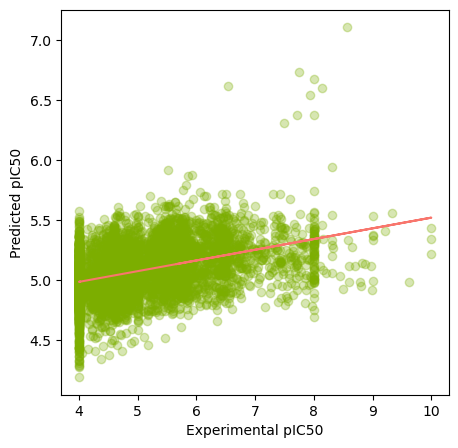

In [122]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [123]:
import pickle

In [124]:
pickle.dump(model, open('jitendra.pkl', 'wb'))